In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [10]:
vip = zarr.open(
    "/data/scratch/ankile/furniture-data/data/processed/sim/feature/vip/one_leg/data.zarr"
)["observations"][:, 14:]

In [11]:
vip.shape

(275395, 2048)

In [12]:
def print_stats(data):
    print(
        f"min: {np.min(data)}, max: {np.max(data)}, mean: {np.mean(data)}, std: {np.std(data)}"
    )

In [13]:
vip_flat = vip.reshape(-1)

min: -29.05980110168457, max: 39.561981201171875, mean: 0.01705080084502697, std: 1.5909817218780518


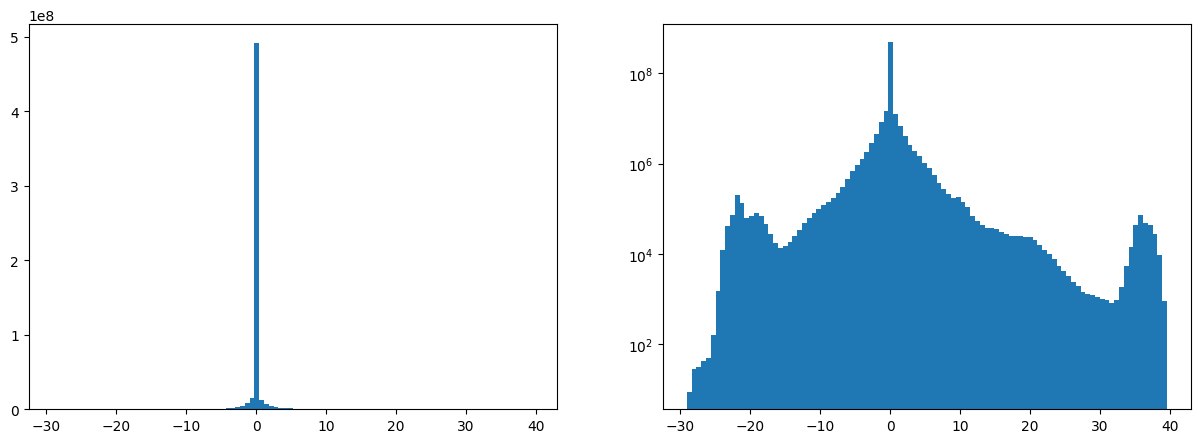

In [15]:
print_stats(vip_flat)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(vip_flat, bins=100)
ax2.hist(vip_flat, bins=100, log=True)

In [16]:
r3m50 = zarr.open(
    "/data/scratch/ankile/furniture-data/data/processed/sim/feature/r3m-50/one_leg/data.zarr"
)["observations"][:, 14:]

r3m50_flat = r3m50.reshape(-1)
r3m50.shape

(278528, 4096)

In [ ]:
print_stats(r3m50_flat)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(r3m50_flat, bins=100)
ax2.hist(r3m50_flat, bins=100, log=True)